In [1]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
from scipy.stats import linregress


#import csv
nba_df= pd.read_csv("Resources/shot_logs.csv")


In [2]:
#display data, and show all columns
with pd.option_context('display.max_columns', None):
    display(nba_df.head())

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,1.9,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,0.8,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,2.7,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,1.9,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,2.7,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


In [3]:
#id unique shooters, and count
nba_shooter= nba_df['player_name'].unique()
shooters= len(nba_shooter)
#print number of unique shooters
print(f"We have {shooters} unique shooters in this dataset.")
#check number of defenders
name_check= nba_df['CLOSEST_DEFENDER_PLAYER_ID'].unique()
defenders=len(name_check)
#print number of unique defenders
print(f"We have {defenders} unique defenders in this dataset.")
#check to see if anyone has the same name, utilizing both name and id
same_name= nba_df['CLOSEST_DEFENDER'].unique()
same_name_check= len(same_name)
print(f"Comparing the number of pairs of defenders with the same name: {defenders-same_name_check}")



#drop columns we won't use
cleaned_df= nba_df.drop(columns=["MATCHUP", "LOCATION", "DRIBBLES", "TOUCH_TIME"])
cleaned_df

We have 281 unique shooters in this dataset.
We have 474 unique defenders in this dataset.
Comparing the number of pairs of defenders with the same name: 1


,GAME_ID,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,W,24,1,1,1:09,10.8,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,W,24,2,1,0:14,3.4,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,W,24,3,1,0:00,NaN,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,W,24,4,2,11:47,10.3,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,W,24,5,2,10:34,10.9,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128064,21400006,L,-16,5,3,1:52,18.3,8.7,2,missed,"Smart, Marcus",203935,0.8,0,0,jarrett jack,101127
128065,21400006,L,-16,6,4,11:28,19.8,0.6,2,made,"Turner, Evan",202323,0.6,1,2,jarrett jack,101127
128066,21400006,L,-16,7,4,11:10,23.0,16.9,2,made,"Thornton, Marcus",201977,4.2,1,2,jarrett jack,101127
128067,21400006,L,-16,8,4,2:37,9.1,18.3,2,missed,"Bradley, Avery",202340,3.0,0,0,jarrett jack,101127


In [4]:
#rename columns to keep capitals case consistent
cleaned_df.rename(columns={"player_name": "PLAYER_NAME",
                  "player_id": "PLAYER_ID"}, inplace=True)

In [5]:
#check data types to see how we can operate on columns
cleaned_df.dtypes

GAME_ID                         int64
W                              object
FINAL_MARGIN                    int64
SHOT_NUMBER                     int64
PERIOD                          int64
GAME_CLOCK                     object
SHOT_CLOCK                    float64
SHOT_DIST                     float64
PTS_TYPE                        int64
SHOT_RESULT                    object
CLOSEST_DEFENDER               object
CLOSEST_DEFENDER_PLAYER_ID      int64
CLOSE_DEF_DIST                float64
FGM                             int64
PTS                             int64
PLAYER_NAME                    object
PLAYER_ID                       int64
dtype: object

In [6]:

#split game clock by the ":" so we can use minutes:seconds for math and comparisons
to_clean= cleaned_df["GAME_CLOCK"].str.split(":",expand=True).astype(int)
#0 is minutes, 1 is seconds
cleaned_df["GAME_CLOCK_SECONDS"]=to_clean[0]*60 + to_clean[1]
#initialize column as empty so we can add to it
cleaned_df["TOTAL_TIME_SECONDS"] = ""
for index,rows in cleaned_df.iterrows(): 
    #multiplier is number of seconds remaining in game. for fourth quarter, multiplier is 0
    multiplier= 0
    #first period in game seconds remaining
    if rows["PERIOD"] == 1:
        multiplier= 36*60
    elif rows["PERIOD"] == 2:
        multiplier= 24*60
    elif rows["PERIOD"] == 3:
        multiplier= 12*60
    #add to new column, multiplier plus seconds at that index    
    cleaned_df.loc[index,["TOTAL_TIME_SECONDS"]]=multiplier+cleaned_df["GAME_CLOCK_SECONDS"][index]

cleaned_df

,GAME_ID,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,PLAYER_NAME,PLAYER_ID,GAME_CLOCK_SECONDS,TOTAL_TIME_SECONDS
0,21400899,W,24,1,1,1:09,10.8,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148,69,2229
1,21400899,W,24,2,1,0:14,3.4,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148,14,2174
2,21400899,W,24,3,1,0:00,NaN,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148,0,2160
3,21400899,W,24,4,2,11:47,10.3,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148,707,2147
4,21400899,W,24,5,2,10:34,10.9,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148,634,2074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128064,21400006,L,-16,5,3,1:52,18.3,8.7,2,missed,"Smart, Marcus",203935,0.8,0,0,jarrett jack,101127,112,832
128065,21400006,L,-16,6,4,11:28,19.8,0.6,2,made,"Turner, Evan",202323,0.6,1,2,jarrett jack,101127,688,688
128066,21400006,L,-16,7,4,11:10,23.0,16.9,2,made,"Thornton, Marcus",201977,4.2,1,2,jarrett jack,101127,670,670
128067,21400006,L,-16,8,4,2:37,9.1,18.3,2,missed,"Bradley, Avery",202340,3.0,0,0,jarrett jack,101127,157,157


In [7]:
#rename split dataframe to minutes and seconds for clarity
to_clean.rename(columns={0: "MINUTES", 1: "SECONDS"}, inplace=True)
#add to original dataframe
cleaned_df=pd.concat([cleaned_df, to_clean], axis=1)

In [8]:
#convert all NaN in Shot_clock category to game_clock
cleaned_df["SHOT_CLOCK"].fillna(cleaned_df["SECONDS"], inplace=True)
#display dataframe to check if shot clock is changed

# dropped all rows (1205) that did not have a shot clock value
cleaned_df = cleaned_df[cleaned_df["SHOT_CLOCK"] <= 24]

#export to csv
cleaned_df.to_csv("Output_Data/Final_nba_df.csv", index= False)
cleaned_df.head()


,GAME_ID,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,SHOT_DIST,PTS_TYPE,SHOT_RESULT,...,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,PLAYER_NAME,PLAYER_ID,GAME_CLOCK_SECONDS,TOTAL_TIME_SECONDS,MINUTES,SECONDS
0,21400899,W,24,1,1,1:09,10.8,7.7,2,made,...,101187,1.3,1,2,brian roberts,203148,69,2229,1,9
1,21400899,W,24,2,1,0:14,3.4,28.2,3,missed,...,202711,6.1,0,0,brian roberts,203148,14,2174,0,14
2,21400899,W,24,3,1,0:00,0.0,10.1,2,missed,...,202711,0.9,0,0,brian roberts,203148,0,2160,0,0
3,21400899,W,24,4,2,11:47,10.3,17.2,2,missed,...,203900,3.4,0,0,brian roberts,203148,707,2147,11,47
4,21400899,W,24,5,2,10:34,10.9,3.7,2,missed,...,201152,1.1,0,0,brian roberts,203148,634,2074,10,34


In [9]:
close_games= cleaned_df.loc[cleaned_df['FINAL_MARGIN'].abs() <= 3]
clutch= close_games.loc[(close_games['MINUTES'] == 0) & (close_games['SECONDS'] <= 24)]
clutch

,GAME_ID,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,SHOT_DIST,PTS_TYPE,SHOT_RESULT,...,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,PLAYER_NAME,PLAYER_ID,GAME_CLOCK_SECONDS,TOTAL_TIME_SECONDS,MINUTES,SECONDS
54,21400768,L,-1,14,4,0:01,1.0,34.4,3,missed,...,201588,3.6,0,0,brian roberts,203148,1,1,0,1
299,21400195,L,-1,2,1,0:00,0.0,23.9,3,missed,...,203894,3.6,0,0,brian roberts,203148,0,2160,0,0
310,21400160,L,-2,3,1,0:04,4.0,24.8,3,made,...,201155,4.2,1,3,brian roberts,203148,4,2164,0,4
349,21400071,W,3,1,1,0:02,2.0,22.1,2,missed,...,203118,3.8,0,0,brian roberts,203148,2,2162,0,2
623,21400768,L,-1,9,2,0:02,2.0,8.2,2,missed,...,201588,2.5,0,0,al jefferson,2744,2,1442,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127831,21400432,W,2,4,1,0:03,3.0,25.0,3,made,...,201148,5.4,1,3,jarrett jack,101127,3,2163,0,3
127928,21400266,W,2,1,1,0:21,14.0,6.9,2,made,...,2225,3.9,1,2,jarrett jack,101127,21,2181,0,21
127933,21400266,W,2,6,3,0:00,0.0,32.1,3,missed,...,201158,4.4,0,0,jarrett jack,101127,0,720,0,0
127980,21400178,W,2,8,2,0:24,21.1,0.9,2,made,...,203460,1.3,1,2,jarrett jack,101127,24,1464,0,24


In [10]:
new_clutch= clutch.groupby("PLAYER_NAME")
made_shots=new_clutch["FGM"].sum()
shot_count= new_clutch["PLAYER_ID"].count()
clutch_chart= pd.DataFrame({"Shot Count": shot_count,
                           "Made Shots": made_shots})
clutch_chart["Success Rate"]= made_shots/shot_count
clutch_chart=clutch_chart.sort_values(["Success Rate", 'Made Shots'], ascending= False)
most_attempts= clutch_chart["Shot Count"].max()
weighted_made_shots= clutch_chart["Made Shots"]*0.5
weighted_success_rate= clutch_chart["Success Rate"]*0.5
clutch_chart["Weighted Rank"]= (weighted_made_shots+weighted_success_rate)/2
clutch_chart.sort_values("Weighted Rank", ascending=False).head(10)


,Shot Count,Made Shots,Success Rate,Weighted Rank
PLAYER_NAME,,,,
brandon knight,17,10,0.588235,2.647059
james harden,11,8,0.727273,2.181818
jarrett jack,12,8,0.666667,2.166667
tyreke evans,18,8,0.444444,2.111111
manu ginobili,17,7,0.411765,1.852941
lou williams,10,6,0.600000,1.650000
tim duncan,13,6,0.461538,1.615385
john wall,17,6,0.352941,1.588235
nikola vucevic,6,5,0.833333,1.458333


In [11]:
three_pts= clutch.loc[clutch["PTS_TYPE"] == 3]
new_three= three_pts.groupby("PLAYER_NAME")
made_threes= new_three["FGM"].sum()
three_count= new_three["PLAYER_ID"].count()
three_chart= pd.DataFrame({"3s Count": three_count,
                          "Made 3s": made_threes})
three_chart["Missed 3s"]= three_count- made_threes
three_chart["Success Rate"]= three_chart["Made 3s"]/three_chart["3s Count"]
weighted_made_threes= made_threes*0.5
weighted_success_rate3= three_chart["Success Rate"]*0.5
three_chart["Weighted Rank"]= (weighted_made_threes+weighted_success_rate3)/2
three_chart.sort_values("Weighted Rank", ascending= False).head(10)

,3s Count,Made 3s,Missed 3s,Success Rate,Weighted Rank
PLAYER_NAME,,,,,
james harden,4,3,1,0.750000,0.937500
danny green,4,3,1,0.750000,0.937500
nick young,6,3,3,0.500000,0.875000
tyreke evans,7,3,4,0.428571,0.857143
trey burke,8,3,5,0.375000,0.843750
kyrie irving,2,2,0,1.000000,0.750000
kyle korver,2,2,0,1.000000,0.750000
stephen curry,3,2,1,0.666667,0.666667
evan turner,3,2,1,0.666667,0.666667


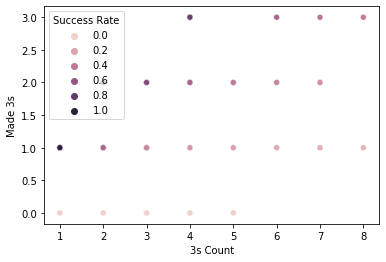

In [12]:
sns.scatterplot(data=three_chart, x="3s Count", y="Made 3s", hue="Success Rate")
plt.savefig("Output_Data/Images/total_3s.png")

In [13]:
two_pts= clutch.loc[clutch["PTS_TYPE"] == 2]
new_two= two_pts.groupby("PLAYER_NAME")
made_two= new_two["FGM"].sum()
two_count= new_two["PLAYER_ID"].count()
two_chart= pd.DataFrame({"2s Count": two_count,
                          "Made 2s": made_two})
two_chart["Missed 2s"]= two_count- made_two
two_chart["Success Rate"]= two_chart["Made 2s"]/two_chart["2s Count"]
weighted_made_two= made_two*0.5
weighted_success_rate2= two_chart["Success Rate"]*0.5
two_chart["Weighted Rank"]= (weighted_made_two+weighted_success_rate2)/2
two_chart.sort_values("Weighted Rank", ascending= False).head(10)
#207 players

,2s Count,Made 2s,Missed 2s,Success Rate,Weighted Rank
PLAYER_NAME,,,,,
brandon knight,11,8,3,0.727273,2.181818
jarrett jack,9,7,2,0.777778,1.944444
lou williams,6,6,0,1.000000,1.750000
manu ginobili,11,6,5,0.545455,1.636364
tim duncan,11,6,5,0.545455,1.636364
nikola vucevic,6,5,1,0.833333,1.458333
james harden,7,5,2,0.714286,1.428571
john wall,9,5,4,0.555556,1.388889
chris paul,10,5,5,0.500000,1.375000


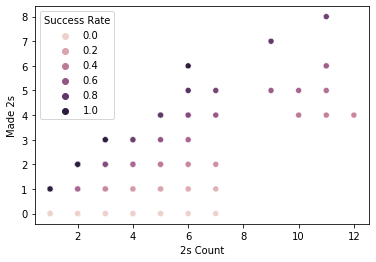

In [14]:
sns.scatterplot(data=two_chart, x="2s Count", y="Made 2s", hue= "Success Rate")
plt.savefig("Output_Data/Images/total_2s.png")

In [15]:
clutchw=clutch.loc[clutch["W"]== 'W']
new_clutch_w= clutchw.groupby("PLAYER_NAME")
made_shots2_w=new_clutch_w["FGM"].sum()
shot_count2_w= new_clutch_w["PLAYER_ID"].count()
clutch_chart_w= pd.DataFrame({"Shot Count": shot_count2_w,
                           "Made Shots": made_shots2_w})
clutch_chart_w["Success Rate"]= made_shots2_w/shot_count2_w
clutch_chart_w=clutch_chart_w.sort_values(["Success Rate", 'Made Shots'], ascending= False)
most_attempts_w= clutch_chart_w["Shot Count"].max()
weighted_made_shots_w= clutch_chart_w["Made Shots"]*0.5
weighted_success_rate_w= clutch_chart_w["Success Rate"]*0.5
clutch_chart_w["Weighted Rank"]= (weighted_made_shots_w+weighted_success_rate_w)/2
clutch_chart_w.sort_values("Weighted Rank", ascending=False)

,Shot Count,Made Shots,Success Rate,Weighted Rank
PLAYER_NAME,,,,
jarrett jack,12,8,0.666667,2.166667
tyreke evans,13,8,0.615385,2.153846
kemba walker,12,5,0.416667,1.354167
james harden,4,4,1.000000,1.250000
marc gasol,4,4,1.000000,1.250000
...,...,...,...,...
devin harris,2,0,0.000000,0.000000
derrick williams,1,0,0.000000,0.000000
dante exum,3,0,0.000000,0.000000


In [16]:
three_pts_w= clutchw.loc[clutch["PTS_TYPE"] == 3]
new_three_w= three_pts_w.groupby("PLAYER_NAME")
made_threes_w= new_three_w["FGM"].sum()
three_count_w= new_three_w["PLAYER_ID"].count()
three_chart_w= pd.DataFrame({"3s Count": three_count_w,
                          "Made 3s": made_threes_w})
three_chart_w["Missed 3s"]= three_count_w- made_threes_w
three_chart_w["Success Rate"]= three_chart_w["Made 3s"]/three_chart_w["3s Count"]
weighted_made_threes_w= made_threes_w*0.5
weighted_success_rate3_w= three_chart_w["Success Rate"]*0.5
three_chart_w["Weighted Rank"]= (weighted_made_threes_w+weighted_success_rate3_w)/2
three_chart_w.sort_values("Weighted Rank", ascending= False).head(10)

,3s Count,Made 3s,Missed 3s,Success Rate,Weighted Rank
PLAYER_NAME,,,,,
nick young,4,3,1,0.75,0.9375
tyreke evans,4,3,1,0.75,0.9375
mike conley,4,2,2,0.50,0.6250
brandon jennings,4,2,2,0.50,0.6250
courtney lee,1,1,0,1.00,0.5000
stephen curry,1,1,0,1.00,0.5000
evan turner,1,1,0,1.00,0.5000
kyrie irving,1,1,0,1.00,0.5000
otto porter,1,1,0,1.00,0.5000


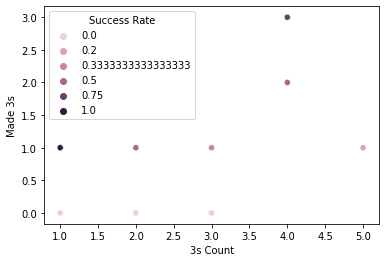

In [17]:
sns.scatterplot(data=three_chart_w, x="3s Count", y="Made 3s", hue= "Success Rate")
plt.savefig("Output_Data/Images/winner_3s.png")

In [18]:
two_pts_w= clutchw.loc[clutch["PTS_TYPE"] == 2]
new_two_w= two_pts_w.groupby("PLAYER_NAME", as_index=True)
made_two_w= new_two_w["FGM"].sum()
two_count_w= new_two_w["PLAYER_ID"].count()
two_chart_w= pd.DataFrame({"2s Count": two_count_w,
                          "Made 2s": made_two_w})
two_chart_w["Missed 2s"]= two_count_w- made_two_w
two_chart_w["Success Rate"]= two_chart_w["Made 2s"]/two_chart_w["2s Count"]
weighted_made_two_w= made_two_w*0.5
weighted_success_rate2_w= two_chart_w["Success Rate"]*0.5
two_chart_w["Weighted Rank"]= (weighted_made_two_w+weighted_success_rate2_w)/2
two_chart_w.sort_values("Weighted Rank", ascending= False).head(10)

,2s Count,Made 2s,Missed 2s,Success Rate,Weighted Rank
PLAYER_NAME,,,,,
jarrett jack,9,7,2,0.777778,1.944444
tyreke evans,9,5,4,0.555556,1.388889
john wall,6,4,2,0.666667,1.166667
russell westbrook,6,4,2,0.666667,1.166667
kemba walker,7,4,3,0.571429,1.142857
james harden,3,3,0,1.000000,1.000000
marc gasol,3,3,0,1.000000,1.000000
nikola vucevic,3,3,0,1.000000,1.000000
brandon knight,4,3,1,0.750000,0.937500


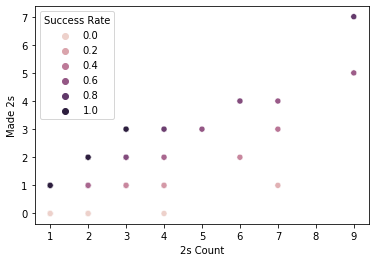

In [19]:
sns.scatterplot(data=two_chart_w, x="2s Count", y="Made 2s", hue= "Success Rate")
plt.savefig("Output_Data/Images/winner_2s.png")

In [20]:
clutchl=clutch.loc[clutch["W"]== 'L']
new_clutch_l= clutchl.groupby("PLAYER_NAME")
loss_count= new_clutch_l["GAME_ID"].count()
made_shots2_l=new_clutch_l["FGM"].sum()
shot_count2_l= new_clutch_l["PLAYER_ID"].count()
clutch_chart_l= pd.DataFrame({"Shot Count": shot_count2_l,
                           "Made Shots": made_shots2_l,
                             "Loss Count": loss_count})
clutch_chart_l["Success Rate"]= made_shots2_l/shot_count2_l
clutch_chart_l=clutch_chart_l.sort_values(["Success Rate", 'Made Shots'], ascending= False)
most_attempts_l= clutch_chart_l["Shot Count"].max()
weighted_made_shots_l= clutch_chart_l["Made Shots"]*0.5
weighted_success_rate_l= clutch_chart_l["Success Rate"]*0.5
clutch_chart_l["Weighted Rank"]= (weighted_made_shots_l+weighted_success_rate_l)/2
clutch_chart_l.sort_values("Weighted Rank", ascending=False)

,Shot Count,Made Shots,Loss Count,Success Rate,Weighted Rank
PLAYER_NAME,,,,,
brandon knight,11,6,11,0.545455,1.636364
chase budinger,5,4,5,0.800000,1.200000
zaza pachulia,6,4,6,0.666667,1.166667
lou williams,7,4,7,0.571429,1.142857
james harden,7,4,7,0.571429,1.142857
...,...,...,...,...,...
demarre carroll,1,0,1,0.000000,0.000000
darrell arthur,2,0,2,0.000000,0.000000
danilo gallinai,2,0,2,0.000000,0.000000


In [21]:
three_pts_l= clutchl.loc[clutch["PTS_TYPE"] == 3]
new_three_l= three_pts_l.groupby("PLAYER_NAME")
made_threes_l= new_three_l["FGM"].sum()
three_count_l= new_three_l["PLAYER_ID"].count()
three_chart_l= pd.DataFrame({"3s Count": three_count_l,
                          "Made 3s": made_threes_l})
three_chart_l["Missed 3s"]= three_count_l- made_threes_l
three_chart_l["Success Rate"]= three_chart_l["Made 3s"]/three_chart_l["3s Count"]
weighted_made_threes_l= made_threes_l*0.5
weighted_success_rate3_l= three_chart_l["Success Rate"]*0.5
three_chart_l["Weighted Rank"]= (weighted_made_threes_l+weighted_success_rate3_l)/2
three_chart_l.sort_values("Weighted Rank", ascending= False).head(10)

,3s Count,Made 3s,Missed 3s,Success Rate,Weighted Rank
PLAYER_NAME,,,,,
danny green,3,3,0,1.000000,1.000000
trey burke,5,3,2,0.600000,0.900000
kyle korver,2,2,0,1.000000,0.750000
james harden,3,2,1,0.666667,0.666667
avery bradley,3,2,1,0.666667,0.666667
jeremy lin,4,2,2,0.500000,0.625000
carmelo anthony,4,2,2,0.500000,0.625000
mo williams,5,2,3,0.400000,0.600000
dwayne wade,6,2,4,0.333333,0.583333


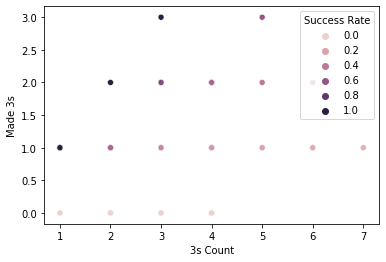

In [22]:
sns.scatterplot(data=three_chart_l, x="3s Count", y="Made 3s", hue= "Success Rate")
plt.savefig("Output_Data/Images/loser_3s.png")

In [23]:
two_pts_l= clutchl.loc[clutch["PTS_TYPE"] == 2]
new_two_l= two_pts_l.groupby("PLAYER_NAME", as_index=True)
made_two_l= new_two_l["FGM"].sum()
two_count_l= new_two_l["PLAYER_ID"].count()
two_chart_l= pd.DataFrame({"2s Count": two_count_l,
                          "Made 2s": made_two_l})
two_chart_l["Missed 2s"]= two_count_l- made_two_l
two_chart_l["Success Rate"]= two_chart_l["Made 2s"]/two_chart_l["2s Count"]
weighted_made_two_l= made_two_l*0.5
weighted_success_rate2_l= two_chart_l["Success Rate"]*0.5
two_chart_l["Weighted Rank"]= (weighted_made_two_l+weighted_success_rate2_l)/2
two_chart_l.sort_values("Weighted Rank", ascending= False).head(10)

,2s Count,Made 2s,Missed 2s,Success Rate,Weighted Rank
PLAYER_NAME,,,,,
brandon knight,7,5,2,0.714286,1.428571
lou williams,4,4,0,1.000000,1.250000
chase budinger,5,4,1,0.800000,1.200000
zaza pachulia,6,4,2,0.666667,1.166667
tim duncan,8,4,4,0.500000,1.125000
luis scola,3,3,0,1.000000,1.000000
dennis schroder,4,3,1,0.750000,0.937500
jeff teague,5,3,2,0.600000,0.900000
markieff morris,5,3,2,0.600000,0.900000


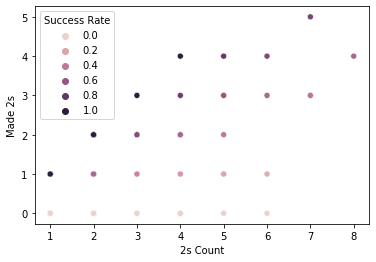

In [24]:
sns.scatterplot(data=two_chart_l, x="2s Count", y="Made 2s", hue= "Success Rate")
plt.savefig("Output_Data/Images/loser_2s.png")

In [25]:
#open shots made percentage, finding shots 6ft or greater from closest defender
open_shots = cleaned_df.loc[cleaned_df["CLOSE_DEF_DIST"] >=6]
open_shots   

,GAME_ID,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,SHOT_DIST,PTS_TYPE,SHOT_RESULT,...,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,PLAYER_NAME,PLAYER_ID,GAME_CLOCK_SECONDS,TOTAL_TIME_SECONDS,MINUTES,SECONDS
1,21400899,W,24,2,1,0:14,3.4,28.2,3,missed,...,202711,6.1,0,0,brian roberts,203148,14,2174,0,14
6,21400899,W,24,7,4,10:15,14.5,20.7,2,missed,...,101127,6.1,0,0,brian roberts,203148,615,615,10,15
8,21400899,W,24,9,4,5:14,12.4,24.6,3,missed,...,202721,7.3,0,0,brian roberts,203148,314,314,5,14
9,21400890,W,1,1,2,11:32,17.4,22.4,3,missed,...,201961,19.8,0,0,brian roberts,203148,692,2132,11,32
18,21400859,L,-8,5,4,10:29,20.8,24.2,3,made,...,202738,11.1,1,3,brian roberts,203148,629,629,10,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127999,21400149,L,-12,3,2,10:42,2.9,17.6,2,made,...,201596,8.3,1,2,jarrett jack,101127,642,2082,10,42
128035,21400090,W,8,4,2,0:55,21.8,17.0,2,made,...,203095,6.9,1,2,jarrett jack,101127,55,1495,0,55
128048,21400060,L,-7,6,4,11:01,9.0,20.2,2,made,...,201147,11.1,1,2,jarrett jack,101127,661,661,11,1
128049,21400060,L,-7,7,4,7:27,11.0,9.4,2,made,...,201593,6.0,1,2,jarrett jack,101127,447,447,7,27


In [26]:
#find shots that were made from these open shots
open_made = open_shots.loc[open_shots["FGM"] == 1]
open_made

,GAME_ID,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,SHOT_DIST,PTS_TYPE,SHOT_RESULT,...,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,PLAYER_NAME,PLAYER_ID,GAME_CLOCK_SECONDS,TOTAL_TIME_SECONDS,MINUTES,SECONDS
18,21400859,L,-8,5,4,10:29,20.8,24.2,3,made,...,202738,11.1,1,3,brian roberts,203148,629,629,10,29
25,21400845,W,12,7,4,10:13,17.1,24.6,3,made,...,201149,6.0,1,3,brian roberts,203148,613,613,10,13
41,21400768,L,-1,1,1,5:58,19.7,24.7,3,made,...,101139,11.3,1,3,brian roberts,203148,358,2518,5,58
42,21400768,L,-1,2,1,5:21,12.8,22.5,3,made,...,201588,7.2,1,3,brian roberts,203148,321,2481,5,21
47,21400768,L,-1,7,3,5:19,9.4,23.1,3,made,...,201228,9.1,1,3,brian roberts,203148,319,1039,5,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127999,21400149,L,-12,3,2,10:42,2.9,17.6,2,made,...,201596,8.3,1,2,jarrett jack,101127,642,2082,10,42
128035,21400090,W,8,4,2,0:55,21.8,17.0,2,made,...,203095,6.9,1,2,jarrett jack,101127,55,1495,0,55
128048,21400060,L,-7,6,4,11:01,9.0,20.2,2,made,...,201147,11.1,1,2,jarrett jack,101127,661,661,11,1
128049,21400060,L,-7,7,4,7:27,11.0,9.4,2,made,...,201593,6.0,1,2,jarrett jack,101127,447,447,7,27


/Users/briennecole/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/briennecole/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


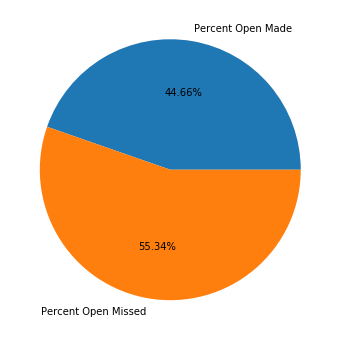

In [27]:
#percentage made
percentage_open_made = len(open_made)/ len(open_shots) *100
open_made["Percent Open Made"] = percentage_open_made 
open_missed = 100 - percentage_open_made
open_made["Percent Open Missed"] = open_missed
open_made
#pie chart for open shots
pie, ax = plt.subplots(figsize=[10,6])
labels = 'Percent Open Made', 'Percent Open Missed'
size = [44.66, 55.34]
ax.pie(size, labels=labels, autopct='%1.2f%%')
pie.savefig("OutputOpen.png")

In [28]:
#player that made the most open shots
all_day = open_made['PLAYER_NAME'].value_counts()
all_day

al horford        134
blake griffin     129
serge ibaka       104
stephen curry     102
gordon hayward     89
                 ... 
omer asik           3
greg smith          3
joey dorsey         2
jerome jordan       2
cole aldrich        2
Name: PLAYER_NAME, Length: 280, dtype: int64

In [29]:
#finding defenders less than 6ft
in_your_face = cleaned_df.loc[cleaned_df["CLOSE_DEF_DIST"] <6]
in_your_face

,GAME_ID,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,SHOT_DIST,PTS_TYPE,SHOT_RESULT,...,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,PLAYER_NAME,PLAYER_ID,GAME_CLOCK_SECONDS,TOTAL_TIME_SECONDS,MINUTES,SECONDS
0,21400899,W,24,1,1,1:09,10.8,7.7,2,made,...,101187,1.3,1,2,brian roberts,203148,69,2229,1,9
2,21400899,W,24,3,1,0:00,0.0,10.1,2,missed,...,202711,0.9,0,0,brian roberts,203148,0,2160,0,0
3,21400899,W,24,4,2,11:47,10.3,17.2,2,missed,...,203900,3.4,0,0,brian roberts,203148,707,2147,11,47
4,21400899,W,24,5,2,10:34,10.9,3.7,2,missed,...,201152,1.1,0,0,brian roberts,203148,634,2074,10,34
5,21400899,W,24,6,2,8:15,9.1,18.4,2,missed,...,101114,2.6,0,0,brian roberts,203148,495,1935,8,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128064,21400006,L,-16,5,3,1:52,18.3,8.7,2,missed,...,203935,0.8,0,0,jarrett jack,101127,112,832,1,52
128065,21400006,L,-16,6,4,11:28,19.8,0.6,2,made,...,202323,0.6,1,2,jarrett jack,101127,688,688,11,28
128066,21400006,L,-16,7,4,11:10,23.0,16.9,2,made,...,201977,4.2,1,2,jarrett jack,101127,670,670,11,10
128067,21400006,L,-16,8,4,2:37,9.1,18.3,2,missed,...,202340,3.0,0,0,jarrett jack,101127,157,157,2,37


In [30]:
#shots made with defenders less than 6ft
contested_made = in_your_face.loc[in_your_face["FGM"] == 1]
contested_made

,GAME_ID,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,SHOT_DIST,PTS_TYPE,SHOT_RESULT,...,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,PLAYER_NAME,PLAYER_ID,GAME_CLOCK_SECONDS,TOTAL_TIME_SECONDS,MINUTES,SECONDS
0,21400899,W,24,1,1,1:09,10.8,7.7,2,made,...,101187,1.3,1,2,brian roberts,203148,69,2229,1,9
7,21400899,W,24,8,4,8:00,3.4,3.5,2,made,...,203486,2.1,1,2,brian roberts,203148,480,480,8,0
11,21400890,W,1,3,4,11:32,12.1,14.6,2,made,...,202391,1.8,1,2,brian roberts,203148,692,692,11,32
12,21400890,W,1,4,4,8:55,4.3,5.9,2,made,...,201941,5.4,1,2,brian roberts,203148,535,535,8,55
15,21400859,L,-8,2,2,10:38,6.4,24.7,3,made,...,203923,5.6,1,3,brian roberts,203148,638,2078,10,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128062,21400006,L,-16,3,2,7:46,7.0,14.5,2,made,...,203935,3.1,1,2,jarrett jack,101127,466,1906,7,46
128063,21400006,L,-16,4,2,5:05,15.3,8.9,2,made,...,203096,5.7,1,2,jarrett jack,101127,305,1745,5,5
128065,21400006,L,-16,6,4,11:28,19.8,0.6,2,made,...,202323,0.6,1,2,jarrett jack,101127,688,688,11,28
128066,21400006,L,-16,7,4,11:10,23.0,16.9,2,made,...,201977,4.2,1,2,jarrett jack,101127,670,670,11,10


/Users/briennecole/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/briennecole/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


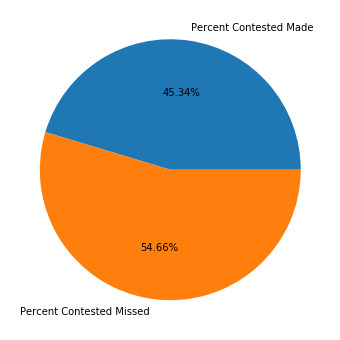

In [31]:
#percentage made with close defender
percentage_close_made = len(contested_made)/ len(in_your_face) *100
contested_made["Percent Contested Made"] = percentage_close_made
contested_missed = 100 - percentage_close_made
contested_missed
contested_made["Percent Contested Missed"] = contested_missed
contested_made

#total_shots_made = len(closeness_made) + len(open_made)
#creating pie chart
pie, ax = plt.subplots(figsize=[10,6])
labels = 'Percent Contested Made', 'Percent Contested Missed'
size = [45.34, 54.66]
ax.pie(size, labels=labels, autopct='%1.2f%%')
pie.savefig("Output_Data/Images/Contested.png")

In [32]:
#player that made the most contested shots
try_me = contested_made['PLAYER_NAME'].value_counts()
try_me

james harden      417
lebron james      410
anthony davis     401
nikola vucevic    399
mnta ellis        398
                 ... 
hedo turkoglu      31
joe harris         27
greg smith         26
alan crabbe        23
mike miller        14
Name: PLAYER_NAME, Length: 281, dtype: int64

In [33]:
# find all the different timepoints
shot_clock_timepoints = cleaned_df.groupby(["SHOT_CLOCK"])
#shot_clock_remaining = shot_clock_timepoints["SHOT_CLOCK"].unique()
# calculate number of shots at each timepoint
shot_clock_shots = shot_clock_timepoints["SHOT_CLOCK"].count()
# calculate number of shots made at each timepoint
shots_made = shot_clock_timepoints["FGM"].sum()
# calculate FG % at each timepoint
fg_percent = shots_made / shot_clock_shots * 100

# make a new dataframe for graphing
graph_df = pd.DataFrame({
    "FG Attempts": shot_clock_shots,
    "FGs Made": shots_made,
    "FG%": fg_percent
})

# reset the index
graph_df = graph_df.reset_index()
graph_df = graph_df.rename(columns={"SHOT_CLOCK": "Shot Clock"})

graph_df

,Shot Clock,FG Attempts,FGs Made,FG%
0,0.0,584,90,15.410959
1,0.1,67,21,31.343284
2,0.2,64,12,18.750000
3,0.3,71,13,18.309859
4,0.4,88,20,22.727273
...,...,...,...,...
236,23.6,147,74,50.340136
237,23.7,128,60,46.875000
238,23.8,112,46,41.071429
239,23.9,91,32,35.164835


The r-value is: 0.803450533698892


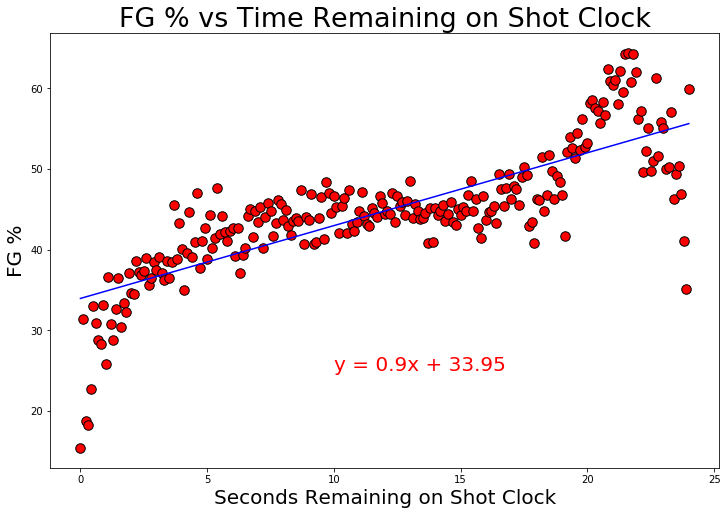

In [34]:
fig1, ax1 = plt.subplots(figsize=(12, 8))

x_value = graph_df["Shot Clock"]
y_value = graph_df["FG%"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_value, y_value, s=90, c="r", edgecolor="k")

# plot regression line
plt.plot(x_value, regress_values, "b-")

# print equation in graph
plt.annotate(line_eq, (10,25), fontsize=20, color="r")


# add labels for readability
plt.title("FG % vs Time Remaining on Shot Clock", fontsize=27)
plt.xlabel("Seconds Remaining on Shot Clock", fontsize=20)
plt.ylabel("FG %", fontsize=20)

print(f"The r-value is: {rvalue}")

plt.savefig("Output_Data/Images/FG%1.png")

plt.show()

In [35]:
two_pointer = cleaned_df.loc[cleaned_df["PTS_TYPE"] <= 2]
three_pointer = cleaned_df.loc[cleaned_df["PTS_TYPE"] > 2]

In [36]:
two_pointer

,GAME_ID,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,SHOT_DIST,PTS_TYPE,SHOT_RESULT,...,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,PLAYER_NAME,PLAYER_ID,GAME_CLOCK_SECONDS,TOTAL_TIME_SECONDS,MINUTES,SECONDS
0,21400899,W,24,1,1,1:09,10.8,7.7,2,made,...,101187,1.3,1,2,brian roberts,203148,69,2229,1,9
2,21400899,W,24,3,1,0:00,0.0,10.1,2,missed,...,202711,0.9,0,0,brian roberts,203148,0,2160,0,0
3,21400899,W,24,4,2,11:47,10.3,17.2,2,missed,...,203900,3.4,0,0,brian roberts,203148,707,2147,11,47
4,21400899,W,24,5,2,10:34,10.9,3.7,2,missed,...,201152,1.1,0,0,brian roberts,203148,634,2074,10,34
5,21400899,W,24,6,2,8:15,9.1,18.4,2,missed,...,101114,2.6,0,0,brian roberts,203148,495,1935,8,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128064,21400006,L,-16,5,3,1:52,18.3,8.7,2,missed,...,203935,0.8,0,0,jarrett jack,101127,112,832,1,52
128065,21400006,L,-16,6,4,11:28,19.8,0.6,2,made,...,202323,0.6,1,2,jarrett jack,101127,688,688,11,28
128066,21400006,L,-16,7,4,11:10,23.0,16.9,2,made,...,201977,4.2,1,2,jarrett jack,101127,670,670,11,10
128067,21400006,L,-16,8,4,2:37,9.1,18.3,2,missed,...,202340,3.0,0,0,jarrett jack,101127,157,157,2,37


In [37]:
three_pointer

,GAME_ID,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,SHOT_DIST,PTS_TYPE,SHOT_RESULT,...,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,PLAYER_NAME,PLAYER_ID,GAME_CLOCK_SECONDS,TOTAL_TIME_SECONDS,MINUTES,SECONDS
1,21400899,W,24,2,1,0:14,3.4,28.2,3,missed,...,202711,6.1,0,0,brian roberts,203148,14,2174,0,14
8,21400899,W,24,9,4,5:14,12.4,24.6,3,missed,...,202721,7.3,0,0,brian roberts,203148,314,314,5,14
9,21400890,W,1,1,2,11:32,17.4,22.4,3,missed,...,201961,19.8,0,0,brian roberts,203148,692,2132,11,32
10,21400890,W,1,2,2,6:30,16.0,24.5,3,missed,...,202391,4.7,0,0,brian roberts,203148,390,1830,6,30
13,21400882,W,15,1,4,9:10,4.4,26.4,3,missed,...,2584,4.4,0,0,brian roberts,203148,550,550,9,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128009,21400138,L,-10,4,3,0:40,16.0,25.9,3,missed,...,203468,1.8,0,0,jarrett jack,101127,40,760,0,40
128016,21400138,L,-10,11,4,0:34,21.1,23.0,3,missed,...,203459,1.7,0,0,jarrett jack,101127,34,34,0,34
128031,21400116,L,-8,4,4,4:19,14.0,23.8,3,missed,...,202738,2.8,0,0,jarrett jack,101127,259,259,4,19
128057,21400033,W,12,2,2,10:02,7.3,22.1,3,missed,...,201571,2.9,0,0,jarrett jack,101127,602,2042,10,2


In [38]:
# find all the different timepoints
shot_clock_timepoints2 = two_pointer.groupby(["SHOT_CLOCK"])
#shot_clock_remaining2 = shot_clock_timepoints2["SHOT_CLOCK"].unique()
# calculate number of shots at each timepoint
shot_clock_shots2 = shot_clock_timepoints2["SHOT_CLOCK"].count()
# calculate number of shots made at each timepoint
shots_made2 = shot_clock_timepoints2["FGM"].sum()
# calculate FG % at each timepoint
fg_percent2 = shots_made2 / shot_clock_shots2 * 100

# make a new dataframe for graphing
graph_df2 = pd.DataFrame({
    "FG Attempts": shot_clock_shots2,
    "FGs Made": shots_made2,
    "FG%": fg_percent2
})

# reset the index
graph_df2 = graph_df2.reset_index()
graph_df2 = graph_df2.rename(columns={"SHOT_CLOCK": "Shot Clock"})

graph_df2

,Shot Clock,FG Attempts,FGs Made,FG%
0,0.0,220,55,25.000000
1,0.1,48,16,33.333333
2,0.2,40,8,20.000000
3,0.3,48,8,16.666667
4,0.4,49,14,28.571429
...,...,...,...,...
236,23.6,138,72,52.173913
237,23.7,125,59,47.200000
238,23.8,108,43,39.814815
239,23.9,91,32,35.164835


The r-value is: 0.8015611842454609


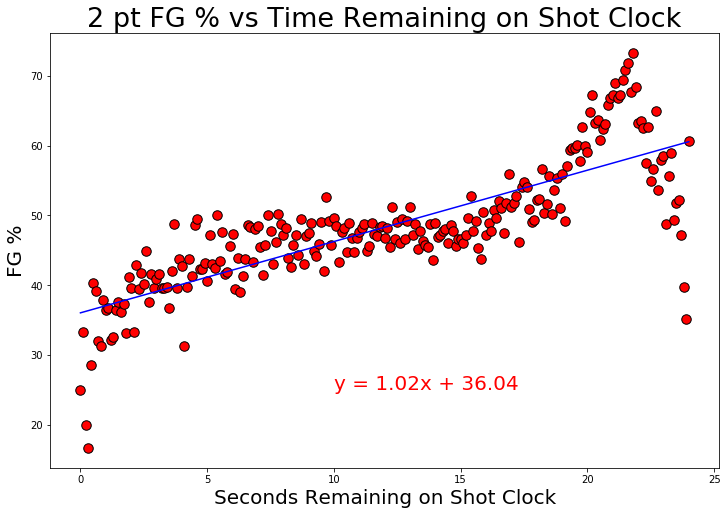

In [39]:
fig1, ax1 = plt.subplots(figsize=(12, 8))
x_value = graph_df2["Shot Clock"]
y_value = graph_df2["FG%"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_value, y_value, s=90, c="r", edgecolor="k")

# plot regression line
plt.plot(x_value, regress_values, "b-")

# print equation in graph
plt.annotate(line_eq, (10,25), fontsize=20, color="r")

# add labels for readibility
plt.title("2 pt FG % vs Time Remaining on Shot Clock", fontsize=27)
plt.xlabel("Seconds Remaining on Shot Clock", fontsize=20)
plt.ylabel("FG %", fontsize=20)

print(f"The r-value is: {rvalue}")

plt.savefig("Output_Data/Images/FG%2.png")

plt.show()

In [40]:
# find all the different timepoints
shot_clock_timepoints3 = three_pointer.groupby(["SHOT_CLOCK"])
#shot_clock_remaining3 = shot_clock_timepoints3["SHOT_CLOCK"].unique()
# calculate number of shots at each timepoint
shot_clock_shots3 = shot_clock_timepoints3["SHOT_CLOCK"].count()
# calculate number of shots made at each timepoint
shots_made3 = shot_clock_timepoints3["FGM"].sum()
# calculate FG % at each timepoint
fg_percent3 = shots_made3 / shot_clock_shots3 * 100

# make a new dataframe for graphing
graph_df3 = pd.DataFrame({
    "FG Attempts": shot_clock_shots3,
    "FGs Made": shots_made3,
    "FG%": fg_percent3
})

# reset the index
graph_df3 = graph_df3.reset_index()
graph_df3 = graph_df3.rename(columns={"SHOT_CLOCK": "Shot Clock"})

graph_df3

,Shot Clock,FG Attempts,FGs Made,FG%
0,0.0,364,35,9.615385
1,0.1,19,5,26.315789
2,0.2,24,4,16.666667
3,0.3,23,5,21.739130
4,0.4,39,6,15.384615
...,...,...,...,...
235,23.5,11,2,18.181818
236,23.6,9,2,22.222222
237,23.7,3,1,33.333333
238,23.8,4,3,75.000000


The r-value is: 0.36473832307707527


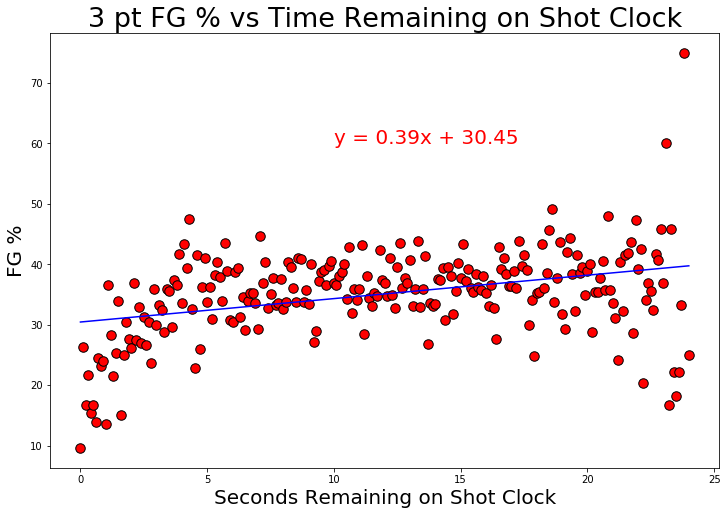

In [41]:
fig1, ax1 = plt.subplots(figsize=(12, 8))
x_value = graph_df3["Shot Clock"]
y_value = graph_df3["FG%"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_value, y_value, s=90, c="r", edgecolor="k")

# plot regression line
plt.plot(x_value, regress_values, "b-")

# print equation in graph
plt.annotate(line_eq, (10,60), fontsize=20, color="r")

# add labels for readibility
plt.title("3 pt FG % vs Time Remaining on Shot Clock", fontsize=27)
plt.xlabel("Seconds Remaining on Shot Clock", fontsize=20)
plt.ylabel("FG %", fontsize=20)

print(f"The r-value is: {rvalue}")

plt.savefig("Output_Data/Images/FG%3.png")

plt.show()

In [42]:
# create bins and bin labels
bin_size = [0, 5, 10, 15, 20, 25]
bin_label_size = ["0-5.0", "5.1-10.0", "10.1-15.0", "15.1-20.0", "20.1-24"]

# create index
graph_df["Shot Clock"] = pd.cut(graph_df["Shot Clock"], bin_size, labels=bin_label_size)

# group dataframe by bins
shot_clock_binning = graph_df.groupby(["Shot Clock"])

# create value(s) for dataframe
fg_attempted = shot_clock_binning["FG Attempts"].sum()
fg_made = shot_clock_binning["FGs Made"].sum()
fg_per = fg_made / fg_attempted * 100

# create dataframe
bin_df = pd.DataFrame({
    "FG Attempts": fg_attempted,
    "FGs Made": fg_made,
    "FG%": fg_per
    })

# format cell for cleaner look
bin_df["FG%"] = bin_df["FG%"].map("{:.2f}".format)

bin_df

,FG Attempts,FGs Made,FG%
Shot Clock,,,
0-5.0,16140,5904,36.58
5.1-10.0,30698,13380,43.59
10.1-15.0,38555,17234,44.70
15.1-20.0,27391,12958,47.31
20.1-24,13496,7799,57.79


In [43]:
# Copy dataframe and create bins
period_df = cleaned_df

# Create bins
bins = [0, 719, 1439, 2159, 2879] 

# Create Group Labels
group_names = ["720-0 (4th QTR)", "1439-720 (3rd QTR)","2159-1440 (2nd QTR)", "2880-2160 (1st QTR)" ]

#Add bins
period_df["Time Remaining on Game Clock (Seconds)"] = pd.cut(period_df["TOTAL_TIME_SECONDS"], bins, labels=group_names)

# Groupby
shots_by_period = period_df.groupby("Time Remaining on Game Clock (Seconds)")
made_shots = shots_by_period["FGM"].sum()
#scores_by_spend = scores_by_spend_df.mean()
success_rate_bin = made_shots / (shots_by_period["FGM"].count())
success_rate_bin


shots_by_quarter = pd.DataFrame ({"Shot Success Rate (%)": success_rate_bin})

format_df = ({'Shot Success Rate (%)':'{:,.2%}'})
shots_by_quarter.head().style.format(format_df)

,Shot Success Rate (%)
Time Remaining on Game Clock (Seconds),
720-0 (4th QTR),43.91%
1439-720 (3rd QTR),45.74%
2159-1440 (2nd QTR),45.10%
2880-2160 (1st QTR),46.05%


In [44]:
# Game clock vs. success rate%
game_clock_df = cleaned_df.groupby(["TOTAL_TIME_SECONDS"])
#game_clock_remaining = game_clock_df["TOTAL_TIME_SECONDS"].unique()

# calculate number of shots at each timepoint
game_clock_shots = game_clock_df["TOTAL_TIME_SECONDS"].count()

# calculate number of shots made at each timepoint
baskets_made = game_clock_df["FGM"].sum()

# calculate FG % at each timepoint
success_percent = baskets_made / game_clock_shots * 100

# make a new dataframe for graphing
clock_chart = pd.DataFrame({
    "FG Attempts": game_clock_shots,
    "FGs Made": baskets_made,
    "FG%": success_percent
})

# reset the index
clock_chart = clock_chart.reset_index()
clock_chart = clock_chart.rename(columns={"TOTAL_TIME_SECONDS": "Game Clock Remaining"})
clock_chart = clock_chart.sort_values("Game Clock Remaining", ascending=False)
clock_chart.tail()

,Game Clock Remaining,FG Attempts,FGs Made,FG%
4,4,73,26,35.616438
3,3,69,25,36.231884
2,2,85,21,24.705882
1,1,108,36,33.333333
0,0,58,9,15.517241


The r-value is: 0.07572086789432846


/Users/briennecole/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.


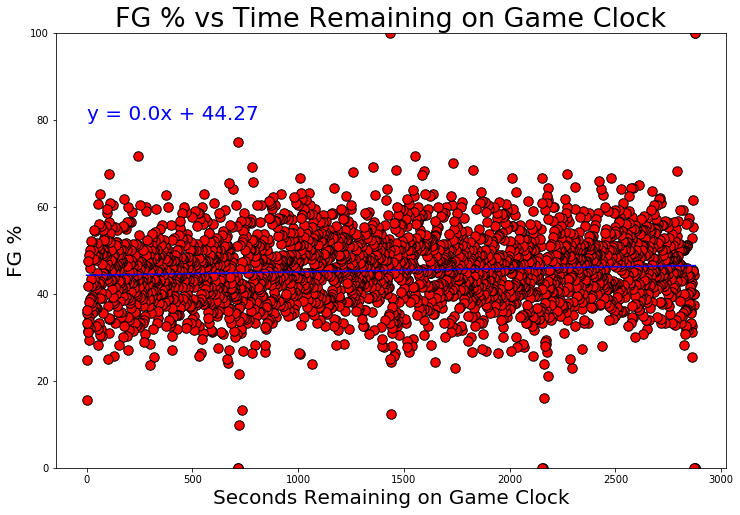

In [45]:
# Scatter plot Graph
fig2, ax2 = plt.subplots(figsize=(12, 8))

x_value2 = clock_chart["Game Clock Remaining"]
y_value2 = clock_chart["FG%"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value2, y_value2)
regress_values = x_value2 * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_value2, y_value2, s=90, c="r", edgecolor="k")
plt.ylim(0, 100)

# plot regression line
plt.plot(x_value2, regress_values, "b-")

# print equation in graph
plt.annotate(line_eq, (0,80), fontsize=20, color="B")


# add labels for readability
plt.title("FG % vs Time Remaining on Game Clock", fontsize=27)
plt.xlabel("Seconds Remaining on Game Clock", fontsize=20)
plt.ylabel("FG %", fontsize=20)

print(f"The r-value is: {rvalue}")

plt.savefig("Output_Data/Images/game_clock.png")

plt.show()

In [46]:
#Groupby closest defender

closest_defender = cleaned_df.groupby(["CLOSEST_DEFENDER"])
closest_defender2 = closest_defender["CLOSEST_DEFENDER"].unique()
# closest_defender.head()

# Count the number of times each player was the "closest defender"
defender_count = closest_defender["CLOSEST_DEFENDER"].count()
# defender_count

# Calculate number of times shot was successful
defender_failure = closest_defender["FGM"].sum()

# From that Calculate the number of times the shot was missed
defender_success = defender_count - defender_failure

# Calculate defense success rate
success_rate = round((defender_success / defender_count), 2)

# Put calculations into new DataFrame
defender_df = pd.DataFrame({
    "No. of Times Closest Defender": defender_count,
    "No. of FG made against": defender_failure,
    "No. of successful defenses": defender_success,
    "Success Rate": success_rate
})



defender_df.head()

,No. of Times Closest Defender,No. of FG made against,No. of successful defenses,Success Rate
CLOSEST_DEFENDER,,,,
"Acy, Quincy",276,118,158,0.57
"Adams, Jordan",28,15,13,0.46
"Adams, Steven",484,215,269,0.56
"Adrien, Jeff",73,40,33,0.45
"Afflalo, Arron",451,187,264,0.59


In [47]:
# Top Performing Defenders
#Sort and display the top ten defensive players by % missed FG's as the closest defender.
top_defense = defender_df.sort_values("Success Rate", ascending=False)
top_defense.head(10)

,No. of Times Closest Defender,No. of FG made against,No. of successful defenses,Success Rate
CLOSEST_DEFENDER,,,,
"Lucas, Kalin",1,0,1,1.00
"Ledo, Ricky",1,0,1,1.00
"Dragic, Zoran",2,0,2,1.00
"Green, JaMychal",12,2,10,0.83
"James, Bernard",32,7,25,0.78
"Udoh, Ekpe",13,3,10,0.77
"Datome, Gigi",4,1,3,0.75
"Robinson, Nate",98,27,71,0.72
"Mekel, Gal",10,3,7,0.70


In [48]:
# Top frequent defenders
#Sort and display the top ten defensive players by frequency as closest defender.
top_defense = defender_df.sort_values("No. of Times Closest Defender", ascending=False)
top_defense.head(10)

,No. of Times Closest Defender,No. of FG made against,No. of successful defenses,Success Rate
CLOSEST_DEFENDER,,,,
"Ibaka, Serge",814,334,480,0.59
"Jordan, DeAndre",795,381,414,0.52
"Green, Draymond",750,301,449,0.60
"Gasol, Pau",748,348,400,0.53
"Millsap, Paul",733,351,382,0.52
"Vucevic, Nikola",694,333,361,0.52
"Frye, Channing",691,354,337,0.49
"Love, Kevin",691,315,376,0.54
"Chandler, Tyson",686,323,363,0.53


In [49]:
# Find the most frequent defenders
frequent_flyer = defender_df.loc[defender_df["No. of Times Closest Defender"] >= 600]
frequent_flyer.count()

No. of Times Closest Defender    26
No. of FG made against           26
No. of successful defenses       26
Success Rate                     26
dtype: int64

In [50]:
# Top Performing Defenders
# Now that we've got the players with the highest frequency of being closest defender, 
#sort and display the top ten defensive players by % missed FG's as the closest defender.
top_defense2 = frequent_flyer.sort_values("Success Rate", ascending=False)
top_defense2.head(10).style.format(format_df)

,No. of Times Closest Defender,No. of FG made against,No. of successful defenses,Success Rate
CLOSEST_DEFENDER,,,,
"Green, Draymond",750,301,449,0.600000
"Davis, Anthony",608,247,361,0.590000
"Ibaka, Serge",814,334,480,0.590000
"Noah, Joakim",628,265,363,0.580000
"Bledsoe, Eric",650,280,370,0.570000
"Smith, Josh",647,276,371,0.570000
"Gasol, Marc",618,268,350,0.570000
"Harden, James",605,264,341,0.560000
"Gortat, Marcin",677,297,380,0.560000


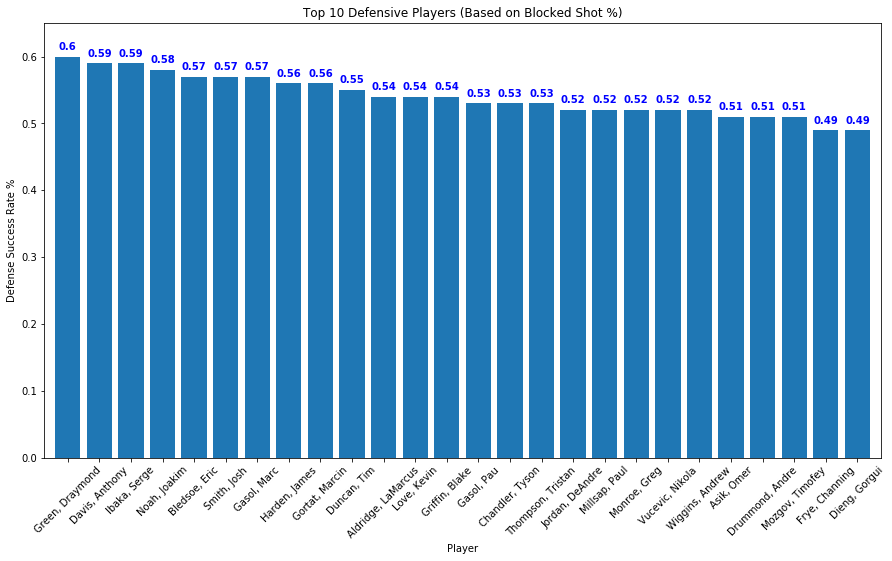

In [51]:
# Reset index to create graphs
defense_bar_df = top_defense2.reset_index()
#defense_bar.head()
# Create bar graph of top defensive players
fig1, ax1 = plt.subplots(figsize=(15,8))

plt.bar(defense_bar_df["CLOSEST_DEFENDER"], defense_bar_df["Success Rate"])
plt.xticks(rotation=45)
plt.xlabel("Player")
plt.ylabel("Defense Success Rate %")
plt.title("Top 10 Defensive Players (Based on Blocked Shot %)")
plt.xlim(-0.75, len(defense_bar_df["CLOSEST_DEFENDER"])-0.25)
plt.ylim(0, max(defense_bar_df["Success Rate"])+0.05)

for i, v in enumerate(defense_bar_df["Success Rate"]):
    plt.text(i + .0001, v + .01, str(v), color='blue', fontsize = 10, fontweight='bold', ha='center')

plt.savefig('Output_Data/Images/best_defender_bar.png')
plt.show()